<h1>Support Vector Machines (SVM)</h1>

Bei einem überblickbaren Dataset wie in der Abbildung 1, ist das Ziel diese Datenpunkte zu unterscheiden.

Die Boundary, die gezogen wird (in der Abbildung 1 ist es linear) soll diese Trennung vornehmen. Die Grenze kann dabei linear sein oder eine andere Form annehmen, welches konfigurierbar ist.

Verschiedene Linien können passen, um die beste zu finden wird Margin von nahen Datenpunkten maximiert. Dadurch ist genug Abstand da, um kommende Datenpunkte besser einzugruppieren. Es gibt einige Parameter, die die Arbeitsweise von SVM verändern.

<i>Abb1</i>: SVM teilt die Gruppen ein und versucht Margin zu maximieren. 

<img src="./files_data/img/sklearn_svm_1.PNG" width=500 hight=500>

In einem 2D Raum ist die Grenze eine Linie, im 3D Raum eine Ebene, und in höheren Dimensionen eine Hyperebene (Hyperplane)

<i>Abb2</i>: Beispielhafte Darstellung der Gamma Einstellung.  

<img src="./files_data/img/sklearn_svm_2.PNG" width=700 hight=400>

Der Gamma Parameter: <br>
Der Gamma Parameter verändert die Boundary, was nur bei nicht linearen Boundaries möglich ist. 

High Gamma: Schaut sich nur die naheliegenden Punkte an. Die anderen, die weiter weg sind, spielen keine Rolle. <br>
Die Einflussreichweite der Datenpunkte ist beschränkter. Durch das enge anliegen an den Punkten ist das Model etwas komplizierter und es gibt mehr Kurven. Wenn der Gamma Wert sehr hoch ist, kann es zu Overfitting führen.

Low Gamma: Hier werden auch die Datenpunkte in Betracht gezogen, die etwas weiter weg sind. Datenpunkte, die weiter weg sind, haben auch einen Einfluss. Das Ergebnis ist, dass es eher generalisiert, ein zu niedriger Wert kann zu Underfitting führen.<br> 
Kurzgesagt: wie hoch ist die Einflussreichweite der Datenpunkte. 


Kernel: <br>
Kernel bezeichnet die Funktion für das Erstellen der Boundary. Ein Kernel der linear ist, erzeugt eine gerade Linie, die eine Gruppe von Punkten klassifizieren soll, wie in der Abbildung 1. <br>
Ein Kernel kann Linear, Polynomial, Sigmoid und Radial basis function (RBF) sein. <br>
Ein Kernel kann die Features transformieren, um das Problem besser zu lösen. Für eine bessere Unterscheidung können die Datenpunkte auf eine höhere Ebene der Dimension angehoben werden (z. B. 2D => 3D). 

C (L2 Regulierung): <br>
Der Parameter C steuert die L2 Regulierung des Models. Damit kann die Größe des Margins eingestellt werden. <br>
Hoher C-Wert: Minimiert die miss Klassifikation der Trainingsdaten => Margin ist klein. <br>
Niedriger C-Wert: Bei niedrigeren Werten tauchen öfter miss Klassifikationen auf, was okay sein kann. Das Model wird generalisiert. => Margin ist größer.

<i>Abb3</i>: Beispielhafte Darstellung der Reguliering.  

<img src="./files_data/img/sklearn_svm_3.PNG" width=700 hight=400>

Um die optimalen Parameter für das Model zu finden, kann Grid Search angewendet werden.

Die Verwendung von SVM ist einfach und schnell an einem Beispiel zu zeigen. Als Dataset nutzen wir das Iris Dataset, bereitgestellt von Sklearn.

In [5]:
# Imports 
import pandas as pd

from sklearn.datasets import load_iris  # Dataset
from sklearn.svm      import SVC        # SVM Klassifizierer  

from sklearn.model_selection import GridSearchCV  # Grid Search
import matplotlib.pyplot     as plt             

In [6]:
iris_data = load_iris()  # Lade Daten.
iris_data.keys()         # Zeige verfügbare Keys.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# Erstelle Dataframe.
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Füge target hinzu.
iris_df = pd.concat([iris_df, pd.DataFrame(iris_data.target, columns=['class'])], axis="columns")
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Die verschiedenen Merkmale können als Plot angezeigt werden. 

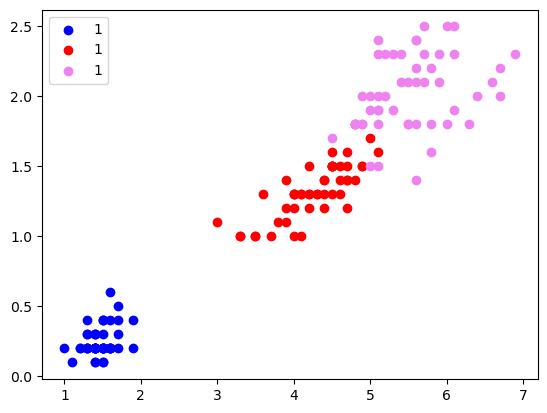

In [27]:
# petal length #

classes = [0, 1, 2]
colors  = ['blue', 'red', 'violet']
for i in classes:
    plt.scatter(iris_df.loc[ iris_df['class']==i, ['petal length (cm)']] , \
            iris_df.loc[ iris_df['class']==i, ['petal width (cm)']], color=colors[i], label=1)
plt.legend()

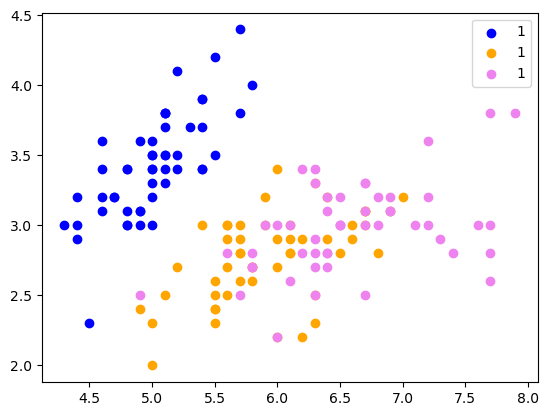

In [25]:
# petal length #
classes = [0, 1, 2]
colors  = ['blue', 'orange', 'violet']

for i in classes:
    plt.scatter(iris_df.loc[ iris_df['class']==i, ['sepal length (cm)']] , \
            iris_df.loc[ iris_df['class']==i, ['sepal width (cm)']], color=colors[i], label=1)
plt.legend()

Für das weitere Vorgehen, werden wir beide (sepal, petal) separieren und einzeln für das Training nutzen.

Dabei können wir später sehen, wie sich die Modelle in den Parametern unterscheiden.

In [11]:
# Wende direkt Grid Search an. petal. 

gridSearch = GridSearchCV( SVC() , { 
    'C':      [1, 2, 10],                            # Regulierung
    'kernel': ['rbf','linear', 'poly', 'sigmoid'],   # Boundary Funktion
    'gamma':  [0.5, 3, 'auto'],     # Einfluss Datenpunkte 
    'degree': [2, 3, 4]             # Grad der Polynomialen Funktion. 
}, cv=5, return_train_score=False)  # Mit Cross Validation 5

gridSearch.fit(iris_df[['petal length (cm)', 'petal width (cm)' ]], iris_df['class'])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 10], 'degree': [2, 3, 4],
                         'gamma': [0.5, 3, 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

Jetzt können die Werte ausgelesen werden. <br>
Eine Tabellenansicht mit Pandas ist auch möglich. 

In [12]:
gridSearch.best_params_

{'C': 2, 'degree': 4, 'gamma': 3, 'kernel': 'poly'}

In [13]:
gridSearch.best_score_

0.9733333333333334

In [14]:
# Wende direkt Grid Search an. sepal. 

gridSearch = GridSearchCV( SVC() , { 
    'C':      [1, 2, 10,],                           # Regulierung
    'kernel': ['rbf','linear', 'poly', 'sigmoid'],   # Boundary Funktion
    'gamma':  [0.5, 3, 'auto'],   # Einfluss Datenpunkte 
    'degree': [2, 3, 4,]             # Grad der Polynomialen Funktion. 
}, cv=5, return_train_score=False)   # Mit Cross Validation 5

gridSearch.fit(iris_df[['sepal length (cm)', 'sepal width (cm)' ]], iris_df['class'])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 10], 'degree': [2, 3, 4],
                         'gamma': [0.5, 3, 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [15]:
gridSearch.best_params_

{'C': 2, 'degree': 2, 'gamma': 0.5, 'kernel': 'rbf'}

In [13]:
gridSearch.best_score_

0.8333333333333334

<h1>Boundary  Plot</h1>

Bei einem einfachen Dataset können die Grenzen geplottet werden, dadurch wird sichtbar wie das Model entschscheidungen trifft. 

Als Vorführung nehmen wir das Iris Dataset.

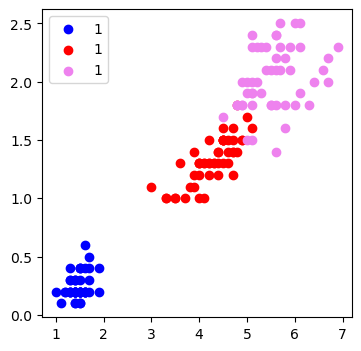

In [30]:
classes = [0, 1, 2]
colors  = ['blue', 'red', 'violet']

plt.figure(figsize=(4, 4))
for i in classes:
    plt.scatter(iris_df.loc[ iris_df['class']==i, ['petal length (cm)']] , \
            iris_df.loc[ iris_df['class']==i, ['petal width (cm)']], color=colors[i], label=1)
plt.legend()    

In [95]:
X, y  = iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['class']
model = creat_model(X, y, kernel='rbf')

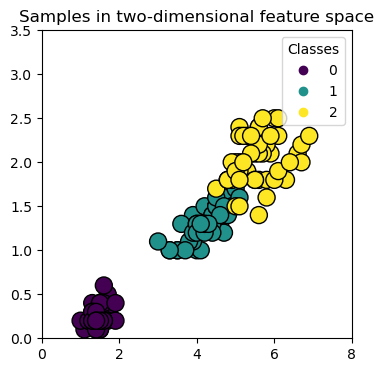

In [122]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(4, 4))
x_min, x_max, y_min, y_max = 0, 8, 0, 3.5
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

scatter = ax.scatter(X['petal length (cm)'], X['petal width (cm)'], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

del scatter

In [120]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = 0, 8, 0, 3.5
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="auto", # predict
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="auto", # decision_function
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )
    ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

NameError: name 'scatter' is not defined

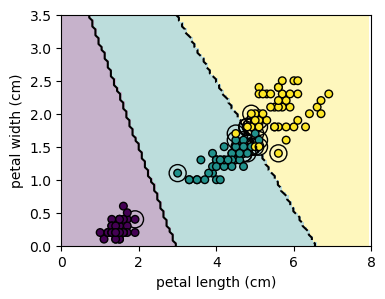

In [121]:
plot_training_data_with_decision_boundary("linear")